# Modelo SIR.

El modelo SIR (Susceptible-Infectado-Recuperado) es utilizado para describir
la propagación de enfermedades infecciosas.

Es un modelo compartimental simple donde las tasas de transferencias entre compartimientos
son expresadas como derivadas con respecto del tiempo y su formulación es un sistema dinámico
de tres ecuaciones diferenciales ordinarias (ODE).

Una de las principales suposiciones del modelo es que la población es constante y cerrada, es decir,
no se permiten nacimientos ni muertes ajenas a la enfermedad.

Además, se asume que una vez que una persona se recupera, adquiere inmunidad permanente y no puede volver a
enfermarse.

Las funciones S(t), I(t) y R(t) representan el número de individuos en el compartimento correspondiente
en un instante de tiempo t. Los parámetros del modelo son:

b_t: Tasa de transmisión de la enfermedad.
g_r: Tasa de recuperación de los individuos infectados, los individuos en I se recuperan y pasan a R.
N: Población total (N = S(t) + I(t) + R(t)).

Las ecuaciones que rigen la dinámica del modelo son:

$dS/dt = \frac{- β * S * I}{N} $

$dI/dt = \frac{β * S * I}{N} - γ * I$

$dR/dt = γ * I$

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


# Modelo.

In [9]:
def SIR_model(x,t): # Toma el vector x = [S,I,R] y el tiempo.
    S, I, R = x

    dS_dt = - beta * I * S/N  # Al ser un modelo cerrado podemos dividir por N ya que siempre será igual.
    dI_dt = beta * I * S / N - gamma * I
    dR_dt = gamma*I
    return [dS_dt, dI_dt, dR_dt]

# Parámetros.

In [10]:
beta = 1  # Infection rate
gamma = 0.5 # Recovery rate
N = 1.56e9    # Total population

# Estados iniciales.

In [11]:
I_0 = 1/1e6     # Initial infected population
S_0 = N-I_0  # Initial susceptible population (exposed)
R_0 = 0      # Initial recovered population
x0 = [S_0, I_0, R_0] # Vector inicial

# Simulación de tiempo.

In [12]:
t_start = 0.0
t_end = 100.0
num_points = 1000
time_points = np.linspace(t_start, t_end, num_points) # Genera 1000 puntos entre 0 y 100 equiespaciados.

# Soluciones encontradas.

In [13]:
sol = odeint(SIR_model, x0, time_points,rtol=1e-6, atol=1e-12)
S = sol[:, 0]
I = sol[:, 1]
R = sol[:, 2]

# Ploteo.


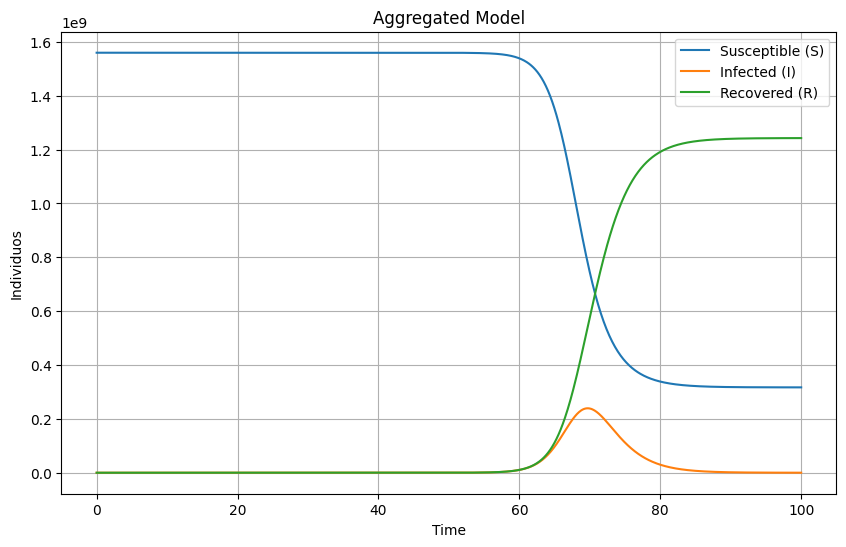

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(time_points, S, label='Susceptible (S)')
plt.plot(time_points, I, label='Infected (I)')
plt.plot(time_points, R, label='Recovered (R)')
plt.title('Aggregated Model')
plt.xlabel('Time')
plt.ylabel('Individuos')
plt.grid(True)
plt.legend()
plt.show()